<a href="https://colab.research.google.com/github/sdsd38931/raz/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [2]:
#Youre code is here
from google.colab import files
#uploaded = files.upload()
import pandas as pd
df = pd.read_excel('data.xlsx')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [7]:
#Youre code is here
df.columns
df.columns = df.columns.str.lower()
df.columns
df['дата сделки'] = pd.to_datetime(df['дата сделки'])
df['дата оплаты'] = pd.to_datetime(df['дата оплаты'])
df.head(2)

df.isnull().sum()
df['продажи факт, тыс.руб'] = df['продажи факт, тыс.руб'].astype(float)
df['продажи план, тыс.руб'] = df['продажи план, тыс.руб'].astype(float)
df = df.drop_duplicates()

df.isnull().sum()

df = df.apply(lambda col: col.where(~col.isna(), pd.NA))
df['дней между сделкой и оплатой'] = df['дней между сделкой и оплатой'].fillna(0)
df['дней между сделкой и оплатой'] = df['дней между сделкой и оплатой'].replace(0, pd.NA)


df['суммарные продажи'] = df.groupby('город')['продажи факт, тыс.руб'].transform('sum')
df.head(1)

,номер заказа,канал продаж,продуктовый сегмент,менеджер,название заказа,продавец,город,"продажи факт, тыс.руб","продажи план, тыс.руб",дата сделки,дата оплаты,дней между сделкой и оплатой,статус,суммарные продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300.0,500.0,2020-02-03,2020-03-25,52,Закрыто,1370.0


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [8]:
#Youre code is here
df['месяц'] = df['дата сделки'].dt.to_period('M')
monthly_performance = df.groupby('месяц').agg({'продажи факт, тыс.руб': 'sum', 'продажи план, тыс.руб': 'sum'})
monthly_performance['выполнение плана (%)'] = (monthly_performance['продажи факт, тыс.руб'] / monthly_performance['продажи план, тыс.руб']) * 100
print(monthly_performance)

         продажи факт, тыс.руб  продажи план, тыс.руб  выполнение плана (%)
месяц                                                                      
2019-06                    0.0                  500.0              0.000000
2019-07                    0.0                 1000.0              0.000000
2019-10                  700.0                 1000.0             70.000000
2019-11                  620.0                 1000.0             62.000000
2019-12                  920.0                 3500.0             26.285714
2020-01                17935.0                14000.0            128.107143
2020-02                15574.0                17500.0             88.994286
2020-03                11032.0                14000.0             78.800000
2020-04                 2225.0                 4000.0             55.625000
2020-05                10625.0                 9000.0            118.055556
2020-06                 7580.0                19000.0             39.894737


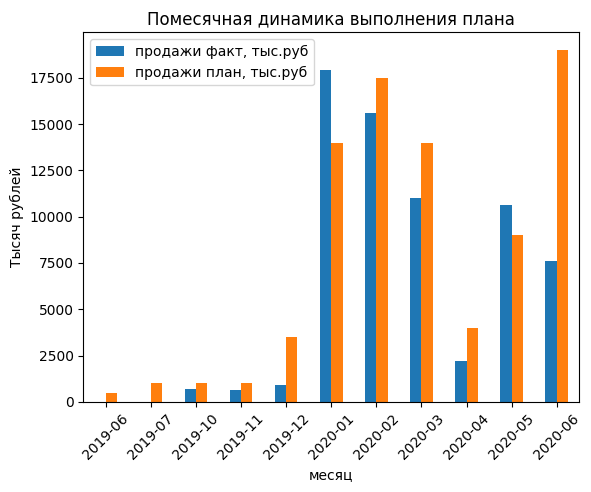

In [9]:
import matplotlib.pyplot as plt

monthly_performance[['продажи факт, тыс.руб', 'продажи план, тыс.руб']].plot(kind='bar')
plt.title('Помесячная динамика выполнения плана')
plt.ylabel('Тысяч рублей')
plt.xticks(rotation=45)
plt.show()

In [10]:
segment_performance = df.groupby(['продуктовый сегмент', 'месяц']).agg({'продажи факт, тыс.руб': 'sum'}).reset_index()

# Выбор сегментов с наибольшими суммарными продажами
total_sales_by_segment = df.groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)
print(total_sales_by_segment)

# Проверка сегментов с нулевыми продажами
zero_sales_segments = segment_performance[segment_performance['продажи факт, тыс.руб'] == 0]
print(zero_sales_segments)

продуктовый сегмент
Оборудование              35099.0
Другое                     7225.0
Свет                       6950.0
Ткань и аксессуары         5712.0
Одежда                     4650.0
Электронные устройства     2130.0
Бассейн                    1500.0
Сувениры                    970.0
Спорт товары                750.0
Автозапчасти                700.0
Упаковка                    675.0
Медецина                    400.0
Игрушки                     250.0
Косметика                   200.0
Охота и рыбалка               0.0
Name: продажи факт, тыс.руб, dtype: float64
       продуктовый сегмент    месяц  продажи факт, тыс.руб
2                   Другое  2019-12                    0.0
6                  Игрушки  2020-06                    0.0
10            Оборудование  2019-12                    0.0
20         Охота и рыбалка  2020-01                    0.0
28      Ткань и аксессуары  2019-06                    0.0
35      Ткань и аксессуары  2020-06                    0.0
39  Электронн

In [11]:
regional_performance = df.groupby('город')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)
print(regional_performance)

город
Челябинск          8700.0
Казань             8040.0
Магнитогорск       7680.0
Сочи               6950.0
Новосибирск        5725.0
Самара             5574.0
Уфа                4350.0
Волгоград          4250.0
Москва             3717.0
Оренбург           2750.0
Тула               1850.0
Нижний Новгород    1635.0
Кемерово           1500.0
Санкт-Петербург    1370.0
Улан-Удэ            970.0
Пермь               770.0
Курск               700.0
Саратов             430.0
Омск                250.0
Севастополь           0.0
Стоврополь            0.0
Липецк                0.0
Ярославль             0.0
Name: продажи факт, тыс.руб, dtype: float64


In [12]:
channel_performance = df.groupby('канал продаж').agg({
    'продажи факт, тыс.руб': 'sum',
    'продажи план, тыс.руб': 'sum',
    'статус': lambda x: (x == 'Закрыто').sum()
})
channel_performance['конверсия (%)'] = (channel_performance['статус'] / channel_performance['продажи план, тыс.руб']) * 100
print(channel_performance)

                     продажи факт, тыс.руб  продажи план, тыс.руб  статус  \
канал продаж                                                                
Вебсайт                              800.0                 2000.0       2   
Выставка                           28644.0                35500.0      28   
Контекстная реклама                 2450.0                 7000.0       5   
Почта                               1550.0                 3500.0       3   
Рекомендация                       18035.0                17000.0      25   
Холодный звонок                    15732.0                19500.0      30   

                     конверсия (%)  
канал продаж                        
Вебсайт                   0.100000  
Выставка                  0.078873  
Контекстная реклама       0.071429  
Почта                     0.085714  
Рекомендация              0.147059  
Холодный звонок           0.153846  


In [14]:
print(df.dtypes)
df['дней между сделкой и оплатой'] = pd.to_numeric(df['дней между сделкой и оплатой'], errors='coerce')

номер заказа                             int64
канал продаж                            object
продуктовый сегмент                     object
менеджер                                object
название заказа                         object
продавец                                object
город                                   object
продажи факт, тыс.руб                  float64
продажи план, тыс.руб                  float64
дата сделки                     datetime64[ns]
дата оплаты                     datetime64[ns]
дней между сделкой и оплатой            object
статус                                  object
суммарные продажи                      float64
месяц                                period[M]
dtype: object


In [15]:
average_duration = df.groupby('канал продаж')['дней между сделкой и оплатой'].mean()
print(average_duration)

канал продаж
Вебсайт                20.000000
Выставка                9.214286
Контекстная реклама    29.800000
Почта                  57.000000
Рекомендация           26.440000
Холодный звонок        44.033333
Name: дней между сделкой и оплатой, dtype: float64


In [16]:
category_performance = df.groupby('продуктовый сегмент').agg({
    'продавец': 'nunique',  # Количество уникальных клиентов
    'продажи факт, тыс.руб': 'sum'
}).sort_values(by='продажи факт, тыс.руб', ascending=False)
print(category_performance)

                        продавец  продажи факт, тыс.руб
продуктовый сегмент                                    
Оборудование                   7                35099.0
Другое                         4                 7225.0
Свет                           2                 6950.0
Ткань и аксессуары             6                 5712.0
Одежда                         4                 4650.0
Электронные устройства         4                 2130.0
Бассейн                        1                 1500.0
Сувениры                       1                  970.0
Спорт товары                   1                  750.0
Автозапчасти                   1                  700.0
Упаковка                       1                  675.0
Медецина                       1                  400.0
Игрушки                        1                  250.0
Косметика                      1                  200.0
Охота и рыбалка                1                    0.0


In [17]:
zero_sales_segments = category_performance[category_performance['продажи факт, тыс.руб'] == 0]
print(zero_sales_segments)

                     продавец  продажи факт, тыс.руб
продуктовый сегмент                                 
Охота и рыбалка             1                    0.0


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Эффективность по каналам

Анализ показывает, что каналы, такие как "Рекомендация" и "Холодный звонок", демонстрируют высокие показатели конверсии — 14.7% и 15.4% соответственно. Это свидетельствует о том, что менеджеры, работающие в этих направлениях, более успешно завершают сделки. В то же время каналы с низкой конверсией, такие как "Вебсайт" и "Контекстная реклама", требуют внимания для повышения своих результатов.
Длительность сделки
Средняя продолжительность сделки колеблется от 9.2 дней (выставка) до 57 дней (почта). Это может указывать на то, что некоторые каналы требуют больше времени для завершения сделок. Рекомендуется проанализировать причины длительности сделок в этих каналах.
Рекомендация

Следует профилировать менеджеров по успешным каналам и категориям товаров, чтобы выявить их сильные стороны. Это поможет направить ресурсы на обучение и развитие навыков в менее эффективных каналах.
Расширение самых доходных каналов продаж
Каналы с высоким доходом: Канал "Выставка" приносит наибольшие объемы продаж — 28,644 тыс. руб., что делает его одним из самых прибыльных. Канал "Рекомендация" также показывает хорошие результаты с продажами на уровне 18,035 тыс. руб. Рекомендуется инвестировать в наиболее доходные каналы, такие как "Выставка" и "Рекомендация". Это может включать увеличение маркетингового бюджета или улучшение условий для клиентов.
География продаж

Самые прибыльные регионы: Челябинск (8,700 тыс. руб.), Казань (8,040 тыс. руб.) и Магнитогорск (7,680 тыс. руб.) являются лидерами по доходам. В то же время Севастополь, Ставрополь и Липецк показывают нулевые продажи, что может указывать на недостаток маркетинга или интереса к продуктам в этих областях. Рекомендуется сосредоточиться на регионах с высоким спросом, таких как Челябинск и Казань, для увеличения объемов продаж, а также рассмотреть возможность проведения маркетинговых кампаний в регионах с нулевыми продажами для повышения осведомленности о продуктах.
Заключение

На основании проведенного анализа можно сделать вывод о необходимости профилирования менеджеров по их эффективности в различных каналах и категориях товаров. Также стоит рассмотреть возможность расширения успешных каналов продаж и активизации работы в регионах с высоким спросом.